In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.datasets import make_regression, load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

import matplotlib.pyplot as plt

In [2]:
# import some data to play with
iris = load_iris()

regress = make_regression(n_samples=20, n_features=1, random_state=0, noise=4.0, bias=100.0)

In [3]:
X_iris = iris.data[:, :2]  # we only take the first two features.
y_iris = iris.target

le = preprocessing.LabelEncoder()
le.fit(y_iris)

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=.2, random_state=42)

X_reg, y_reg = regress

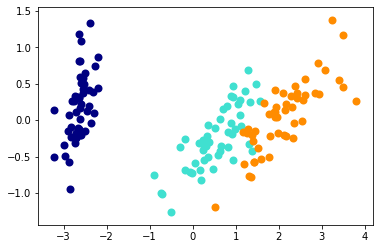

In [4]:
_iris_pca = PCA(n_components=2)
iris_pca = _iris_pca.fit_transform(iris.data)

X_train_pca, X_test_pca, y_train_pca, \
    y_test_pca = train_test_split(iris_pca, y_iris, test_size=.2, random_state=42)

colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(iris_pca[y_iris == i, 0], iris_pca[y_iris == i, 1],
                color=color, lw=2, label=target_name)

In [5]:
iris_target = iris.target.reshape(-1,1)

iris_df = pd.DataFrame(np.concatenate((iris_target, iris.data), axis=1), columns = ['Label']+iris.feature_names)
iris_df


,Label,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.0,5.1,3.5,1.4,0.2
1,0.0,4.9,3.0,1.4,0.2
2,0.0,4.7,3.2,1.3,0.2
3,0.0,4.6,3.1,1.5,0.2
4,0.0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,2.0,6.7,3.0,5.2,2.3
146,2.0,6.3,2.5,5.0,1.9
147,2.0,6.5,3.0,5.2,2.0
148,2.0,6.2,3.4,5.4,2.3


***

In [6]:
svc_poly = SVC(kernel='poly') 
svc_poly.__name__ = 'svc_poly'
svc_poly.fit(X_train, y_train)
svc_pol_score = svc_poly.score(X_test, y_test)

In [7]:
svc_linear = SVC(kernel='linear')
svc_linear.__name__ = 'svc_linear'
svc_linear.fit(X_train, y_train)
svc_lin_score = svc_linear.score(X_test, y_test)

In [8]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.__name__ = 'svc_rbf'
svc_rbf.fit(X_train, y_train)
svc_rbf_score = svc_rbf.score(X_test, y_test)

In [9]:
logreg_liblinear = LogisticRegression(solver='liblinear')
logreg_liblinear.__name__ = 'logreg_liblinear'
logreg_liblinear.fit(X_train, y_train)
logreg_liblinear_score = logreg_liblinear.score(X_test, y_test)

In [10]:
logreg = LogisticRegression(solver='lbfgs')
logreg.__name__ = 'logreg_lbfgs'
logreg.fit(X_train, y_train)
logreg_score = logreg.score(X_test, y_test)

In [11]:
logreg_pca = LogisticRegression(solver='liblinear')
logreg_pca.__name__ = 'logreg_pca_liblinear'
logreg_pca.fit(X_train_pca, y_train_pca)
logreg_pca_score = logreg_pca.score(X_test_pca, y_test_pca)

In [12]:
logreg_pca_lbfgs = LogisticRegression(solver='lbfgs')
logreg_pca_lbfgs.__name__ = 'logreg_pca_lbfgs'
logreg_pca_lbfgs.fit(X_train_pca, y_train_pca)
logreg_pca_lbfgs_score = logreg_pca_lbfgs.score(X_test_pca, y_test_pca)

In [13]:
knn = KNeighborsClassifier() 
knn.__name__ = 'knn'
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)

In [14]:
dtree = DecisionTreeClassifier(min_samples_split=3, min_samples_leaf=3) 
dtree.__name__ = 'dtree'
dtree.fit(X_train, y_train)
dtree_score = dtree.score(X_test, y_test)

In [15]:
mlp = MLPClassifier()
mlp.__name__ = 'mlp'
mlp.fit(X_train, y_train)
mlp_score = mlp.score(X_test, y_test)

/home/aulianorman/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
randfor = RandomForestClassifier(n_estimators=100, min_samples_split=3, min_samples_leaf=3)
randfor.__name__ = 'randfor'
randfor.fit(X_train, y_train)
randfor_score = randfor.score(X_test, y_test)

In [17]:
mult_nb = MultinomialNB()
mult_nb.__name__ = 'multinomial_naivebayes'
mult_nb.fit(X_train, y_train)
mult_nb_score = mult_nb.score(X_test, y_test)

***

In [18]:
def plotDecisionBoundary(estimator, X_values, scores):
    figure = plt.figure(figsize=(9, 9))
    i=1
    if type(estimator) is list:
        for est, x_val, score in zip(estimator, X_values, scores):
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            x_min, x_max = x_val[:, 0].min() - .5, x_val[:, 0].max() + .5
            y_min, y_max = x_val[:, 1].min() - .5, x_val[:, 1].max() + .5

            h = .02  # step size in the mesh
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

            Z = est.predict(np.c_[xx.ravel(), yy.ravel()])
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            
            ax=plt.subplot(4, 3, i)
            ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu)
            
            # Plot also the training points
            ax.scatter(x_val[:, 0], x_val[:, 1], c=np.squeeze(y_iris), edgecolors='k', cmap=plt.cm.RdBu)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            ax.set_title(est.__name__)
            
            ax.text(xx.max() - .3, yy.min() + .3, ('score:%.2f' % score).lstrip('0'),
                size=14, horizontalalignment='right', color='black')
            
            i += 1
    plt.tight_layout()
    plt.show()

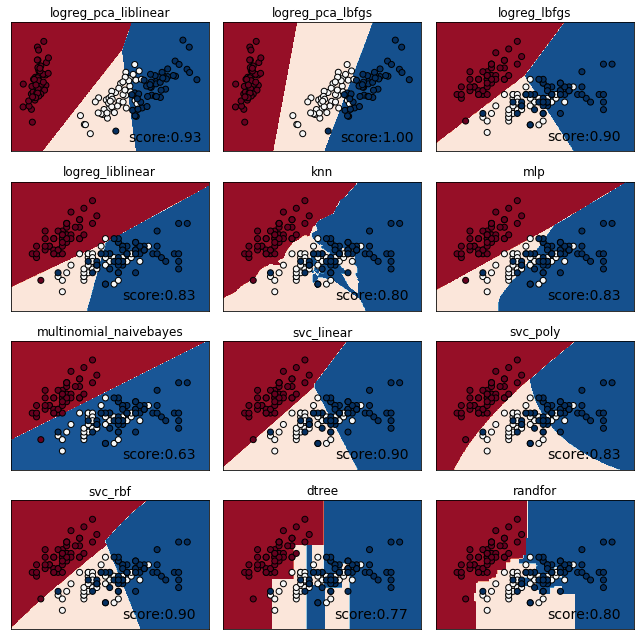

In [19]:
plotDecisionBoundary([logreg_pca, logreg_pca_lbfgs, logreg, logreg_liblinear, knn, mlp, 
                      mult_nb, svc_linear, svc_poly, svc_rbf, dtree, randfor],
                     
                     [iris_pca, iris_pca, X_iris, X_iris, X_iris, X_iris,
                      X_iris, X_iris, X_iris, X_iris, X_iris, X_iris],
                     
                     [logreg_pca_score, logreg_pca_lbfgs_score, logreg_score,
                      logreg_liblinear_score, knn_score, mlp_score,  mult_nb_score,
                      svc_lin_score, svc_pol_score, svc_rbf_score, dtree_score, randfor_score])

***